In [1]:
#load up the basics
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

#Set GPU to use
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#import TF stuff
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Check TensorFlow Version
print('TF version: {}' .format(tf.__version__))

#Check for GPU utilization
if tf.test.gpu_device_name():
    print(' GPU: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU")

TF version: 2.9.1
 GPU: /device:GPU:0


In [2]:
#Load up the TF model

#model path
model_path = './model/FRF_mar15_remap_fullmodel_model'

# load model into tf
model = tf.keras.models.load_model(model_path, compile = True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 7)  91          ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 7)  28         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 activation_6 (Activation)      (None, 128, 128, 28  0           ['batch_normalization_6[0][0]']  
                                )                                                                 
                                                                                                  
 activation_7 (Activation)      (None, 128, 128, 28  0           ['batch_normalization_7[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 128, 128, 28  63532       ['activation_6[0][0]']           
                                )                                                                 
                                                                                                  
 add_2 (Add)                    (None, 128, 128, 28  0           ['activation_7[0][0]',           
          

                                                                                                  
 activation_15 (Activation)     (None, 32, 32, 112)  0           ['batch_normalization_15[0][0]'] 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 32, 32, 112)  1016176     ['activation_15[0][0]']          
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 64, 64, 112)  0           ['conv2d_16[0][0]']              
                                                                                                  
 concatenate (Concatenate)      (None, 64, 64, 168)  0           ['up_sampling2d[0][0]',          
                                                                  'add_3[0][0]']                  
                                                                                                  
 batch_nor

                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 256, 256, 28  1988        ['concatenate_2[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_23 (BatchN  (None, 256, 256, 28  112        ['conv2d_23[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_24 (BatchN  (None, 256, 256, 28  112        ['conv2d_25[0][0]']              
 ormalization)                  )                                                                 
          

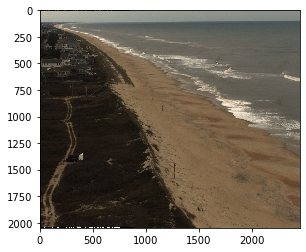

In [3]:
#find an image
ImPath = "../data/FRF_c1_snap_20191112160000.jpg"
img = matplotlib.image.imread(ImPath)
imgplot = plt.imshow(img)

In [4]:
# standardization using adjusted standard deviation, as required by Gym model

def standardize(img):

    N = np.shape(img)[0] * np.shape(img)[1]
    s = np.maximum(np.std(img), 1.0 / np.sqrt(N))
    m = np.mean(img)
    img = (img - m) / s
    del m, s, N
    #
    if np.ndim(img) == 2:
        img = np.dstack((img, img, img))

    return img

In [5]:
## And we can send it through the model

TestIm = tf.keras.preprocessing.image.load_img(ImPath,target_size = (512,512))
TestIm = tf.keras.preprocessing.image.img_to_array(TestIm)
TestIm = standardize(TestIm)
TestIm = np.expand_dims(TestIm,axis=0)
TestPred = model.predict(TestIm)
TestPred.shape

1/1 [==============================] - 3s 3s/step


(1, 512, 512, 4)

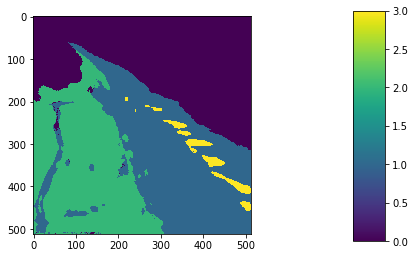

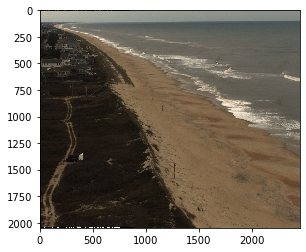

In [6]:
#these are the actual indicies, thes classes (whcih we get with argmax)
am_input = TestPred.squeeze()
lab = np.argmax(am_input,-1)

# plot the fig where background: 0; sand:1; veg : 2; coarseLag : 3

plt.imshow(lab)
cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()
plt.imshow(img)